Loading data...
54000 train samples
6000 validation samples
10000 test samples
Sample shape: (1, 28, 28)
Number of classes: 10

Train...
Epoch: 1/20
  54016/54000 [============] - ETA: 14s - loss: 0.7898 - acc: 0.7519 - val_loss: 0.3558 - val_acc: 0.8920
Epoch: 2/20
  54016/54000 [============] - ETA: 13s - loss: 0.2981 - acc: 0.9102 - val_loss: 0.2834 - val_acc: 0.9190
Epoch: 3/20
  54016/54000 [============] - ETA: 17s - loss: 0.2258 - acc: 0.9321 - val_loss: 0.2123 - val_acc: 0.9373
Epoch: 4/20
  54016/54000 [============] - ETA: 17s - loss: 0.1808 - acc: 0.9454 - val_loss: 0.1698 - val_acc: 0.9507
Epoch: 5/20
  54016/54000 [============] - ETA: 17s - loss: 0.1501 - acc: 0.9541 - val_loss: 0.1496 - val_acc: 0.9570
Epoch: 6/20
  54016/54000 [============] - ETA: 18s - loss: 0.1282 - acc: 0.9610 - val_loss: 0.1372 - val_acc: 0.9602
Epoch: 7/20
  54016/54000 [============] - ETA: 18s - loss: 0.1118 - acc: 0.9655 - val_loss: 0.1094 - val_acc: 0.9690
Epoch: 8/20
  54016/54000 [==========

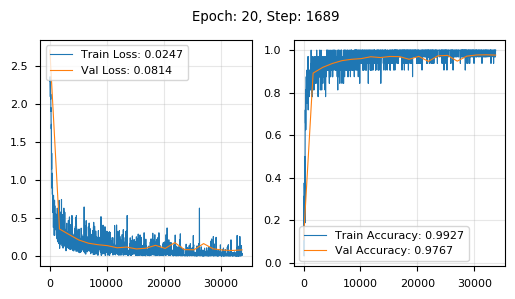

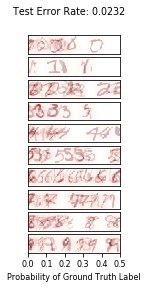

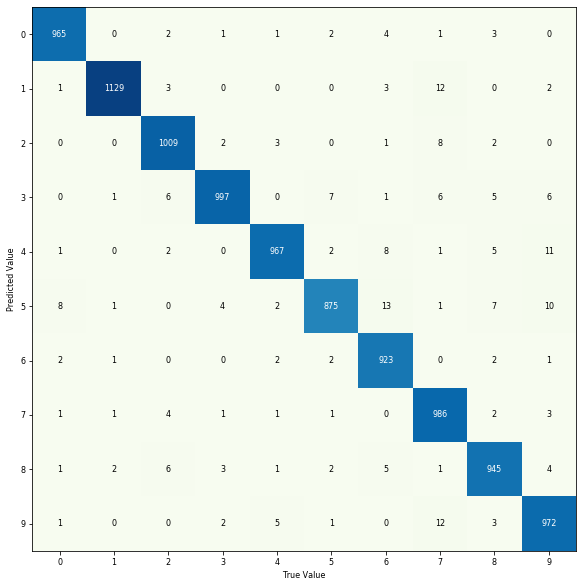

In [1]:
# model.py
# ---------
# Licensing Information:  You are free to use or extend these projects for
# educational purposes provided that (1) you do not distribute or publish
# solutions, (2) you retain this notice, and (3) you provide clear
# attribution to Clemson University and the authors.
# 
# Authors: Pei Xu (peix@g.clemson.edu) and Ioannis Karamouzas (ioannis@g.clemson.edu)


'''
Team Members FOR PROJECT - 6:
SUBBA RAO ILLA (C16280847)
SUNDARESH NARAYANAN (C73923755)
Digit Classification
'''


"""
In this assignment, you will train a deep neural network model   
to classify handwritten digits from the the MNIST dataset
and handrwitten letters from the notMNIST dataset.

A neural network library, PNet, built on numpy is given. Lots of common
mathematic operations and data structures are provided in pnet.ops.array 
and pnet.ops.math. Some common neural network operations are provided in 
pnet.ops.nn. These operations usually can be expressed using basic mathematic 
operations, but are wrapped for convenience and computational efficiency and
correctness. Several different optimization algoritms based on the gradient 
descent method are provided to compute gradients on learnable parameters.

Example: Linear Regression using PNet
    In linear regression, we need to fit a line to a set of training samples 
    consisting of input features and corresponding target values. To do this, 
    we can minimize the square (L2) loss or mean squared error (MSE) between
    actual values and predicted ones, i.e. 
        minimize L = 1/2 \sum_i (h(x^(i)) - y^(i))^2      (L2 loss)
    or
        minimize L = 1/(2N) \sum_i (h(x^(i)) - y^(i))^2   (MSE loss)
        subject to
                h(x) = x*w + b
    where x^(i) denotes the input features of the i-th sample, y^(i) is the target 
    value for x^(i), N is the total number of samples, * denotes the dot product
    between x and w, and w and b are the parameters we want to learn. 
    
    We can use gradient descent on a batch of samples to optimize for w, and b. 
    To do so, we need to compute the gradient of the loss function L with respect to 
    the parameters w and b, and update the parameters as: 
        w <- w - alpha * Nabla_w L
        b <- b - alpha * Nabla_b L
    where Nabla_w L is the gradient of L w.r.t. w and Nabla_b L is the
    gradient of L w.r.t. b, as computed using a batch of samples and the current values
    of w and b.

    In assignment 5, we gave you the explicit form of Nabla_w L and Nabla_b L 
    and you used them to perform gradient updates. When using a deep learning framework, 
    typically, we only need to write down the expression for the loss function and all
    gradient computation will be done by the underlying framework. The same applies to PNet.

    Suppose you are given a batch of samples x with shape [N, d], each of
    which has d features, and the corresponding actual values y with shape [N]
    To perform linear regression in PNet, we first need to define the
    parameters w and b:
        import pnet as nn           # import PNet
        w = nn.zeros([d, 1])        # initialize w as a d-by-1 zero matrix 
        b = nn.zeros([1])           # initialize b as a 1-element vector
    and an optimizer
        opt = nn.SGD([w, b], learning_rate)
    nn.SGD is a naive stochastic gradient descent optimizer. It accepts two
    arguments: the first one is a list of all parameters that need to be
    optimized and the second one is the learning rate.

    Then, we need to run several iterations and update the value of w and b
    using a batch of samples (x, y) for each iteration. 
    Given x, the predictions, h(x) = x*w + b, can be written as
        x = nn.constant(x)          # declare x as a constant such that 
        h = nn.matmul(x, w) + b     # no gradient will be propagated to it
        N = x.shape[0]
        assert(h.shape == [N, 1])
    The MSE loss can be obtained by:
        loss = nn.mse_loss(h,y)
    We usually prefer MSE over L2 to prevent a large loss when the batch size is huge.
    Then, we call PNet to perform backpropagation and compute gradients:
        loss.backward()
    and call the optimizer to update the parameters:
        opt.step()
    Before going into the next iteration, we need to clear the currently stored
    gradients by calling:
        opt.zero_grad()
    
    A parameter also can be initialized from a python list:
        w = nn.parameter([[0, 0, 0], [0, 0, 0]], dtype=nn.float32)
        # w is a zero 2-by-3 matrix
    or from a numpy array:
        np_array = np.random.uniform(-0.1, 0.1, size=[2, 3])
        w = nn.parameter(np_array)              # copy assignment
    or
        w = nn.parameter.from_numpy(np_array)   # reference assignment

    We call parameters and results of operations Tensor. The value stored in a
    tensor can be inspected by
        tensor.item()
    The item() method will return a read-only numpy array object containing
    the same value with tensor.
    The value stored in a tensor can be changed by assign() method. Do NOT do
    this unless you know what you are doing.

To differentiate from the linear regression example, you have to modify the code
below to train a neural network for solving multi-class classification problems. 
In the network, each hidden layer is a linear function similar to h(x) above, 
which must then be activated using a non-linear activation function such as tanh 
or relu. In addition, the softmax_cross_entropy_loss should be used that 
converts the linear output layer to softmax probabilities, and then estimates the 
softmax loss between computed probabilities and actual labels. 

Try different learning rates, batch sizes, hidden layer sizes, number of hidden layers 
and initial values for the parameters. You should be able to achieve at least 97% 
accuracy on the MNIST test set after training for a few epochs. The notMNIST one 
is more challenging and you should be aiming for 94% accuracy after making appropriate
changes to your network architecture and to the hyperparameters used.  
"""

import numpy

import pnet as nn
import data
from utils.logger import Logger

# Step 1: define hyperparameters
# choose an optimizer
OPTIMIZER = nn.SGD
# learning rate
LEARNING_RATE = 0.1
# batch size for stochastic mini-batch gradient descent method
BATCH_SIZE = 32
# number of training epochs 
MAX_EPOCHS = 20



# Step 2: load data
print("Loading data...")
DB = data.load_mnist("data/mnist", batch_size=BATCH_SIZE)
# notMNIST is a more challenging dataset to classify the
# alphabetic letters from a to j.
#DB = data.load_mnist("data/not_mnist", batch_size=BATCH_SIZE)
print("{} train samples".format(DB.train.n_examples))
print("{} validation samples".format(DB.validation.n_examples))
print("{} test samples".format(DB.test.n_examples))
print("Sample shape: {}".format(DB.feature_shape))
print("Number of classes: {}".format(DB.n_classes))
print()

# set up the logger
logger = Logger(MAX_EPOCHS, DB)

# Step 3: build up the network model
class Model(object):
    def __init__(self, learning_rate):
        n_features = eval('*'.join(str(e) for e in DB.feature_shape))
        n_classes = DB.n_classes
        self.lr = nn.parameter(learning_rate)
        # Step 3.1: set up learnable parameters/weights. w's should be drawn  
        # from a zero-mean normal distribution. b's should be set to 0
        #######################################################################
        "*** YOUR CODE HERE ***"
        #######################################################################
        self.param = {
           'w1': nn.parameter.from_numpy(numpy.random.normal(0, 0.1, [n_features, 256])),
           'w2': nn.parameter.from_numpy(numpy.random.normal(0, 0.1, [256, 256])),
           'w3': nn.parameter.from_numpy(numpy.random.normal(0, 0.1, [256, 256])),
           'w4': nn.parameter.from_numpy(numpy.random.normal(0, 0.1, [256, n_classes])),
           'b1': nn.parameter.zeros(256),
           'b2': nn.parameter.zeros(256),
           'b3': nn.parameter.zeros(256),
           'b4': nn.parameter.zeros(n_classes)
            
        }
       
    def parameters(self):
        return self.param.values()
    
    # Step 3.2: define the structure of your network and run forward propagation  
    def forward_propagation(self, x):
        """
        Runs a forward propagation of the model for a batch of examples, activating 
        all layers besides the top one. 

        The function should return the linear input to the top layer, i.e.,
        non-normalized scores, with higher scores corresponding to greater 
        probability of an image belonging a particular class. 

        Inputs:
            x: batch with shape [batch_size, 1, 28, 28]
        Output:
            A Tensor with shape [batch_size, 10] containing predicted scores (logits)
        """

        # normalize data to improve performance
        x = x / 127.5 - 1.0
        # flatten the input image data to a 2d matrix in the shape [N, d]
        x = nn.reshape(x, [x.shape[0], -1], inplace=True)
        
        # define the structure of the network to get the logits result from x
        #######################################################################
        "*** YOUR CODE HERE ***"
        logits = None
        logits=nn.sigmoid(nn.matmul(x,self.param['w1'])+self.param['b1'])
        logits=nn.sigmoid(nn.matmul(logits,self.param['w2'])+self.param['b2'])
        logits=nn.sigmoid(nn.matmul(logits,self.param['w3'])+self.param['b3'])
        logits=nn.matmul(logits,self.param['w4'])+self.param['b4']



        #######################################################################
        
        return logits

    # Step 3.3: define the loss function to perform backpropagation
    def get_loss(self, x, y):
        """
        Computes the loss between predicted and target labels for a batch of examples.
        You should use softmax_cross_entropy_loss as your loss that takes as input the 
        logits returned by the forward_propagation function. 

        Inputs:
            x: a batch with shape [batch_size, 1, 28, 28]
            y: the labels of the batch [batch_size]
        Returns: the softmax-based probabilities computed by nn.softmax_cross_entropy, and the loss object
        """
        #######################################################################
        "*** YOUR CODE HERE ***"
        probs = None
        loss  = None
        logits=self.forward_propagation(x)
        loss, probs = nn.softmax_cross_entropy_loss(logits=logits,labels=y,axis=-1)
        #######################################################################
        
        return probs, loss

    def get_correct_predictions(self, preds, y):
        """
        Inputs:
            probs: a batch with shape [batch_size, 10] where each row denotes the probability of the image 
                   belonging to each class
            y: the labels of the batch [batch_size]
        Returns: the number of correct predictions given the probabilities of each batch example and the labels 
        """
        return nn.equal(nn.argmax(preds, axis=-1), y).mean()

# Step 6: train your model
def train():
    """
    Train the model using gradient-based updates
    """ 
    print("Train...")
    get_validation_accuracy()
    try:
        global_step = 0
        for epoch in range(1, MAX_EPOCHS+1):
            logger.start(epoch)
            # iterate over each batch: 
            # 1. forward propagate the model and compute the loss, 
            # 2. backpropagate to compute the gradients
            # 3. apply the gradients
            # 4. monitor the training accuracy: try to reduce the plot 
            #    frequency or disable ploting if it is too slow (see website) 
            for step, (x, y) in enumerate(DB.train, 1):            
                x = nn.constant.from_numpy(x) # convert samples to constant parameters
                y = nn.constant.from_numpy(y) # to improve performance 
           
                #######################################################################
                "*** YOUR CODE HERE ***"
                probs, loss = model.get_loss(x,y)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                accuracy = model.get_correct_predictions(probs, y).item()
                global_step = global_step+1
                logger.log(loss.item(), accuracy, global_step, global_step%MAX_EPOCHS==0)
                #######################################################################
                   
            # perform validation at the end of each epoch        
            get_validation_accuracy()
            # notice the logger the current epoch is done
            logger.done()

    except KeyboardInterrupt:
        # Ctrl+C to interrupt training
        print()

# Step 7: test your model
def test ():
    """
    Test the trained model on the test dataset
    """   
    print("Test...")
    probs = []
    for x, _ in DB.test:
        logits = model.forward_propagation(x)
        if logits is None:
            print("[Error] Failed to get results from the model.forward_propagation()")
            return
        probs.append(nn.softmax(logits))
    if len(probs) == 0 or eval('+'.join(str(p.shape[0]) for p in probs)) != DB.test.n_examples:
        print("[Error] Failed to get valid results from the model.forward_propagation()")
    else:
        probs = nn.concat(probs, axis=0).item()
        logger.confusion_matrix_for_test_set(probs, error_gallery=True)


def get_validation_accuracy():
    """
        Computes the model accuracy on the validation dataset
    """
    # fetch all samples from the validation set
    x, y = DB.validation.next_batch(DB.validation.n_examples)
    # convert samples to PNet parameters
    x = nn.constant.from_numpy(x)
    y = nn.constant.from_numpy(y)
    # forward the model
    probs, loss = model.get_loss(x, y)
    if loss is None:
        print("[Error] Failed to get loss result from the model.get_loss()")
    elif probs is None:
        print("[Error] Failed to get probability result from the model.get_loss()")
    else:
        # get the accuracy
        acc = model.get_correct_predictions(probs, y).item()
        # log it
        logger.validate(loss.item(), acc)

if __name__ == "__main__":
    # Step 4: instantiate the network model
    model = Model(LEARNING_RATE)
    # Step 5: set up the solver through which to apply gradients to the parameters/weights
    optimizer = OPTIMIZER(model.parameters(), model.lr)
    # Step 6: train your model
    train()
    # Step 7: test the model on the test set
    test()
